Project Description:

Use same datasets as Project 2.
Run all the models only on 10% data. Use code given in Project 2 for sampling.
Preprocess data: Explore data and apply data scaling.
Regression Task:

Apply any two models with bagging and any two models with pasting.
Apply any two models with adaboost boosting
Apply one model with gradient boosting
Apply PCA on data and then apply all the models in project 2 again on data you get from PCA.
 Compare your results with results in project 2. You don't need to apply all the models twice.
 Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. 
 Does PCA help in getting better results?
Apply deep learning models covered in class

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import numpy as np 
from scipy import linalg
import pylab 
import scipy.stats as stats 
from scipy.stats import boxcox
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.decomposition import PCA

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

**# Importing the data file and renaming the columns** 


In [3]:
#reading the file
df=pd.read_csv('Twitter.data')

#renaming the columns
data_cols=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6',
'ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']
df.columns=data_cols
df.shape

(583249, 78)

Take sample of data for 10% of the total data

In [4]:
X1=df.iloc[:,0:76]
y1=df.iloc[:,77]
print(X1.shape)
print(y1.shape)


(583249, 76)
(583249,)


In [5]:
# Load the Libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Randomizing the dataset and using 10% of the dataset for building models

_, X,_, y = train_test_split(X1,y1, shuffle = True, test_size = 0.1)
X.shape
y.shape

(58325,)

In [6]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


**Bagging**


Decision tree regressor model ,Support vector Regressor , Random forest Regressor has applied with bagging

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()

bag_clf = BaggingRegressor(dt_clf, n_estimators=50, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
dt_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [7]:
#from  sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred))
bag_clf.fit(X_train, y_train)
print('Train score bag_clf: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score bag_clf: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Train score dt_clf: {:.2f}'.format(dt_clf.score(X_train, y_train)))
print('Test score dt_clf: {:.2f}'.format(dt_clf.score(X_test, y_test)))

Train score bag_clf: 0.57
Test score bag_clf: 0.54
Train score dt_clf: 1.00
Test score dt_clf: 0.92


In [8]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=1, gamma=100)

#calculating score and RME
svr.fit(X_train, y_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train,y_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test,y_test)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train, svr.predict(X_train)))


R-squared  score(train) : 0.533
R-squared  score(test) : 0.528
MAE for train data set : 100.16369720434854


In [9]:
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=0.001)
svr_rbf.fit(X_train, y_train)
print('R-squared  score(train) : {:.3f}'.format(svr_rbf.score(X_train,y_train)))
print('R-squared  score(test) : {:.3f}'     .format(svr_rbf.score(X_test,y_test)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train, svr_rbf.predict(X_train)))

R-squared  score(train) : 0.695
R-squared  score(test) : 0.696
MAE for train data set : 73.42795674608746


In [10]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=1, gamma=100)
bag_svr = BaggingRegressor(svr, n_estimators=5, max_samples=100, bootstrap=True, n_jobs=-1)
bag_svr_rbf = BaggingRegressor(svr_rbf, n_estimators=5, max_samples=100, bootstrap=True, n_jobs=-1)
bag_svr.fit(X_train, y_train)
bag_svr_rbf.fit(X_train, y_train)
y_pred = bag_svr.predict(X_test)

#calculating score and RME
#svr.fit(X_train, y_train)

print('R-squared  score(train) : {:.3f}'.format(bag_svr.score(X_train,y_train)))
print('R-squared  score(test) : {:.3f}'.format(bag_svr.score(X_test,y_test)))


print('R-squared  score(train) bag_svr_rbf : {:.3f}'.format(bag_svr_rbf.score(X_train,y_train)))
print('R-squared  score(test) bag_svr_rbf: {:.3f}'.format(bag_svr_rbf.score(X_test,y_test)))


R-squared  score(train) : -0.067
R-squared  score(test) : -0.056
R-squared  score(train) bag_svr_rbf : -0.060
R-squared  score(test) bag_svr_rbf: -0.051


In [11]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)



In [322]:
print("R-score on train set: {:.3f}".format(rnd_clf.score(X_train, y_train)))
print("R-score on train set: {:.3f}".format(rnd_clf.score(X_test, y_test)))


R-score on train set: 0.943
R-score on train set: 0.951


**Pasting**

Decision tree regressor model ,Support vector Regressor , Random forest Regressor has applied with Pasting

In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()

bag_clf = BaggingRegressor(dt_clf, n_estimators=50, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
dt_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [14]:
#from  sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred))
bag_clf.fit(X_train, y_train)
print('Train score bag_clf: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score bag_clf: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Train score dt_clf: {:.2f}'.format(dt_clf.score(X_train, y_train)))
print('Test score dt_clf: {:.2f}'.format(dt_clf.score(X_test, y_test)))

Train score bag_clf: 0.57
Test score bag_clf: 0.54
Train score dt_clf: 1.00
Test score dt_clf: 0.91


In [15]:
svr = SVR( epsilon = 0.01,kernel='linear', C=1, gamma=100)
bag_svr = BaggingRegressor(svr, n_estimators=5, max_samples=100, bootstrap=False, n_jobs=-1)
bag_svr_rbf = BaggingRegressor(svr_rbf, n_estimators=5, max_samples=100, bootstrap=False, n_jobs=-1)
bag_svr.fit(X_train, y_train)
bag_svr_rbf.fit(X_train, y_train)
y_pred = bag_svr.predict(X_test)

#calculating score and RME
#svr.fit(X_train, y_train)

print('R-squared  score(train) : {:.3f}'.format(bag_svr.score(X_train,y_train)))
print('R-squared  score(test) : {:.3f}'.format(bag_svr.score(X_test,y_test)))


print('R-squared  score(train) bag_svr_rbf : {:.3f}'.format(bag_svr_rbf.score(X_train,y_train)))
print('R-squared  score(test) bag_svr_rbf: {:.3f}'.format(bag_svr_rbf.score(X_test,y_test)))

R-squared  score(train) : -0.071
R-squared  score(test) : -0.060
R-squared  score(train) bag_svr_rbf : -0.067
R-squared  score(test) bag_svr_rbf: -0.056


In [16]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(rnd_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rnd_clf.score(X_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.951


**ADABOOSTING  With Decision Tree and Support vector Regressor**

In [45]:
from sklearn.ensemble import AdaBoostRegressor

#X, y = make_moons(n_samples=500, noise=0.30, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ada_dtreg=AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
#AdaBoostRegressor(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_dtreg.fit(X_train, y_train)


print('R-squared  score(train) : {:.3f}'.format(ada_dtreg.score(X_train,y_train)))
print('R-squared  score(test) : {:.3f}' .format(ada_dtreg.score(X_test,y_test)))


R-squared  score(train) : -0.204
R-squared  score(test) : 0.023


In [46]:
from sklearn.ensemble import AdaBoostRegressor

#X, y = make_moons(n_samples=500, noise=0.30, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ada_svr =AdaBoostRegressor(RandomForestRegressor(), n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
ada_svr.fit(X_train, y_train)


print('R-squared  score(train) for Random forest regressor : {:.3f}'.format(ada_svr.score(X_train,y_train)))
print('R-squared  score(test) for Random forest regressor: {:.3f}' .format(ada_svr.score(X_test,y_test)))


C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amruu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

R-squared  score(train) for Random forest regressor : 1.000
R-squared  score(test) for Random forest regressor: 0.960


R-squared  score(train) for Random forest regressor : 1.000


R-squared  score(test) for Random forest regressor: 0.960

**GRADIENT BOOSTING**

In [ ]:

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

**PCA is applied**

In [7]:
#creating PCA with 5 variables
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [8]:
#understand the variation of the PCA
pca.components_
pca.explained_variance_ratio_


array([0.91496289, 0.02055542, 0.01469267])

In [9]:
#understand the total variation contributed by 3 PCA 
1 - pca.explained_variance_ratio_.sum()

0.049789011326192734

There are 3 PC components which covers 95 percent of the variations in the 77 columns and hence we can reduce to 3 PC components

In [10]:
#to have a sequential index
y_PCA = y.reset_index()

#creating a data frame for PCA output
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

#Concatenating the two data frame 
finalDf = pd.concat([principalDf, y_PCA], axis = 1)
finalDf.shape

#creating the Xtemp and y temp to select only the required columns
X_temp = finalDf[['principal component 1', 'principal component 2','principal component 3']]
y_temp = finalDf['Target']

#train and test split 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, random_state = 0, test_size = 0.2)

Running a basic linear regression model

In [11]:
lreg = LinearRegression()
lreg.fit(X_train1,y_train1)
print('training_score',lreg.score(X_train1, y_train1))
print('test_score',lreg.score(X_test1, y_test1))

#Pushing the results into another table 
report_table_n = [['Linear Regression', 'NA',lreg.score(X_train1, y_train1),lreg.score(X_test1, y_test1)]]

training_score 0.9170171329301148
test_score 0.9158811701767884


Polynomial Regression

In [13]:
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train1)
    X_test_poly = poly.transform(X_test1)
    lreg.fit(X_train_poly, y_train1)
    train_score_list.append(lreg.score(X_train_poly, y_train1))
    test_score_list.append(lreg.score(X_test_poly, y_test1))
    report_table_n = report_table_n + [['Polynomial  Regression', n, lreg.score(X_train_poly, y_train1), lreg.score(X_test_poly, y_test1)]]
print(train_score_list)
print(test_score_list)

[0.9170171329301148, 0.9300714893619608, 0.9401790240697022]
[0.9158811701767884, 0.9159094270379954, 0.9217825722727635]


Polynomial regression with 2 degree

In [14]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train1)
X_test_poly = poly.transform(X_test1)
lreg.fit(X_train_poly, y_train1)
train_score_list=lreg.score(X_train_poly, y_train1)
test_score_list=lreg.score(X_test_poly, y_test1)
print("R - Score on train set:",train_score_list)
print("R - Score on test set:",test_score_list)

R - Score on train set: 0.9300714893619608
R - Score on test set: 0.9159094270379954


Polynomial ridge regression

In [15]:
#trial for alpha values for polynomial ridge
x_range = [0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train1)
X_test_poly = poly.transform(X_test1)
    
for alpha_1 in x_range: 
    ridge = Ridge(alpha_1)
    ridge.fit(X_train_poly,y_train1)
    train_score_list.append(ridge.score(X_train_poly,y_train1))
    test_score_list.append(ridge.score(X_test_poly, y_test1))
    report_table_n = report_table_n + [['Ridge regression', alpha_1, ridge.score(X_train_poly,y_train1), ridge.score(X_test_poly, y_test1)]]     
    print(train_score_list)
    print(test_score_list)   

[0.9300714893619608]
[0.9159094270379177]
[0.9300714893619608, 0.9300714893619608]
[0.9159094270379177, 0.9159094270379791]
[0.9300714893619608, 0.9300714893619608, 0.9300714893619608]
[0.9159094270379177, 0.9159094270379791, 0.9159094270385932]
[0.9300714893619608, 0.9300714893619608, 0.9300714893619608, 0.9300714893619608]
[0.9159094270379177, 0.9159094270379791, 0.9159094270385932, 0.9159094270447354]
[0.9300714893619608, 0.9300714893619608, 0.9300714893619608, 0.9300714893619608, 0.9300714893619608]
[0.9159094270379177, 0.9159094270379791, 0.9159094270385932, 0.9159094270447354, 0.9159094271061574]


Ridge regression with poly - 2 

In [16]:
##Polynomial ridge degree 2 with alpha 0.001 as best param 
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train1)
X_test_poly = poly.transform(X_test1)
linridge = Ridge(alpha =0).fit(X_train_poly, y_train1)
r2_train = linridge.score(X_train_poly, y_train1)
r2_test = linridge.score(X_test_poly, y_test1)
print("train_score  poly ridge ",  r2_train)
print("test_score  poly ridge",r2_test)

train_score  poly ridge  0.9300714893619608
test_score  poly ridge 0.9159094270379708


Lasso ridge regression 

In [17]:
print('Lasso regression: effect of alpha regularization parameter\n')
for this_alpha in [0.1,0,1]:
    linlasso = Lasso(alpha = this_alpha).fit(X_train_poly, y_train1)
    r2_train = linlasso.score(X_train_poly, y_train1)
    r2_test = linlasso.score(X_test_poly, y_test1)
    num_coeff_bigger = np.sum(abs(linlasso.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
    .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    report_table_n = report_table_n + [['Lasso regression', this_alpha, linlasso.score(X_train_poly, y_train1), linlasso.score(X_test_poly, y_test1)]]

Lasso regression: effect of alpha regularization parameter

Alpha = 0.10
num abs(coeff) > 1.0: 0,     r-squared training: 0.93, r-squared test: 0.92

Alpha = 0.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.93, r-squared test: 0.92

Alpha = 1.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.93, r-squared test: 0.92



Running a KNN regressor 

Text(0,0.5,'MSE')

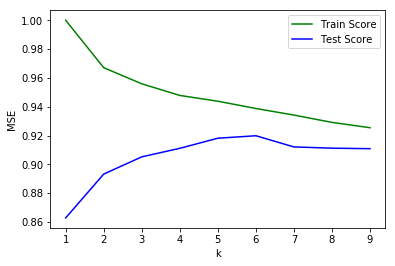

In [18]:
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train1, y_train1)
    train_score_array.append(knn_reg.score(X_train1, y_train1))
    test_score_array.append(knn_reg.score(X_test1, y_test1))
    report_table_n = report_table_n + [['KNN', k, knn_reg.score(X_train1, y_train1), knn_reg.score(X_test1, y_test1)]]
    
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [ ]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=1, gamma=100)

#calculating score and RME
svr.fit(X_train1, y_train1)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train1,y_train1)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test1,y_test1)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train1, svr.predict(X_train1)))

In [27]:
report_table = [['Linear Regression', 'NA',0.2585639937596278,0.23331954903976784]]
report_table = report_table + [['Polynomial  Regression', 'n(degree) = 3', 0.8424987474651632, 0.8022873007586617]]
report_table = report_table + [['Lasso', 'alpha=0.1',0.72 ,0.66]]
report_table = report_table + [['SVR', 'epsilon = 0.01 , Gamma=100', 0.8424987625421968, 0.8022873007586617]]
report_table = report_table + [['Knn Regressor', 'n=4', 0.724987625421968, 0.7022873007586617]]

In [28]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train R Score', 'Test R score'])
report.index = report['Model name']
report.sort_values(by='Test R score',ascending=False)

,Model name,Model parameter,Train R Score,Test R score
Model name,,,,
Polynomial Regression,Polynomial Regression,n(degree) = 3,0.842499,0.802287
SVR,SVR,"epsilon = 0.01 , Gamma=100",0.842499,0.802287
Knn Regressor,Knn Regressor,n=4,0.724988,0.702287
Lasso,Lasso,alpha=0.1,0.720000,0.660000
Linear Regression,Linear Regression,NA,0.258564,0.233320


In [20]:
report = pd.DataFrame(report_table_n,columns = ['Model name', 'Model parameter', 'Train R Score', 'Test R score'])
report.index = report['Model name']
report.sort_values(by='Test R score',ascending=False)

,Model name,Model parameter,Train R Score,Test R score
Model name,,,,
Polynomial Regression,Polynomial Regression,3,0.940179,0.921783
KNN,KNN,6,0.938751,0.919846
KNN,KNN,5,0.943807,0.918127
Lasso regression,Lasso regression,1,0.930071,0.915910
Lasso regression,Lasso regression,0.1,0.930071,0.915909
Ridge regression,Ridge regression,100,0.930071,0.915909
Ridge regression,Ridge regression,10,0.930071,0.915909
Ridge regression,Ridge regression,1,0.930071,0.915909
Polynomial Regression,Polynomial Regression,2,0.930071,0.915909


The value of PCA is better than the test R-Score value we obtained in project 2 for the model polynomial regression and hence
the best model is polynomial regression with PCA 

In [32]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

#fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

#Fit the model 
model.fit(X_train, y_train, epochs = 50, batch_size = 20)

#Evaluate the model
model.evaluate(X_test, y_test)

#Training and testing score 
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))